# Post analysis of **comparison** of old and new uninformative prior

Cases are ordered in terms of niceness; the nicest examples are first.

## Model order posterior

<img src="post/model_order_posterior_cmp.png" alt="2D posterior of the model orders given `new` and file" style="height: 600px;"/>

## Trend order posterior

<img src="post/trend_order_posterior_cmp.png" style="height: 400px;"/>

## Conclusions

- The new prior and highest $Q$ `(new=True,Q=5)` dominates (100%) for every file, which enables easy model averaging. (Averaging models over $Q$ gives the problem of combining the right frequencies with each other, since the frequencies can shift anywhere; this is not a problem for the `new=False` models where the frequencies live in the intervals specified by the Jeffreys priors.)

- In contrast, the MAP $Q$ values for the `new=False` models are between two (`awb`) to four (`bdl`) and three for the others.

- As before, we always find evidence of a trend (`P > 0`). Such low-frequency components imply that the unaltercated Fourier transform magnitude spectrum is a suboptimal estimator (Van Soom 2019a). "Unaltercated" here means without windowing, detrending, and other "ad-hoc" measures.

- The splitting of peaks into doublets and triplets is also seen in Bretthorst (1988) and may indicate physical effects; or it could be artifacts stemming from inappropriate assumptions such as Lorentzian decay (as implied by the assumed LTI system theory). It is a general feature of our model (the likelihood function) and also happens when allowed by the old prior -- but in an inconvenient way: see "All old priors have inconveniences" below. Our model is thus a VTR model by nature, and using it to (frustrating it into) estimate formants is not trivial. The fact that specifiying (Jeffreys) bounds for VTRs without mode hopping or other nuisances is hard is a problem that our new prior solves.

- Ways to properly turn the model into a formant rather than a VTR estimator could be achieved by:

  * Changing the likelihood: expand the decay modes into polynomials or another parametrization as in (Bretthorst 1988) to model the broad peaks -- this effectively gets us beyond LTI poles and zeros (but still LTI; just not expressible with a rational transfer function).
  * And simultaneously using a prior with *correlations* between the $u_j$ to make sure that formant frequencies don't get too close to each other. Our prior cannot do this; it is too uninformative.

- The doublets and triplets also happen in LPC and could be interpreted as "only" spectrum shaping factors. However, the following facts seem to point toward physical existence of these multiplets:
  * Their bandwidths are well-behaved (e.g. around 50 or 100 Hz); shaping formants usually have broad bandwidths (i.e. very broad peaks)
  * The multiplet frequencies cluster around peaks; shaping formants are typically more between peaks
  * The multiplet resolving behavior is quite particular to the data, both in number of split components and the formant peak which is split. For example, `jmk/arctic_a0067` has F2 split in a triplet.

-----

- All old priors have inconveniences in one way or another: **mode hopping** (upsetting mean ± std estimates); **bound frustration** because the model wants to resolve a VTR leaning against a bound derived from formant measurements;  **missing higher formants** because the model turned the formant into a VTR; **underestimating formant bandwidths** because extra VTRs are needed to resolve a broad formant.

- All formant estimates agree between old and new prior, except the old prior misses a formant or underestimates the width of a formant. The formant estimator is thus very robust.

- All formant estimates agree roughly with [known F1-F2 values](https://en.wikipedia.org/wiki/Formant#/media/File:Average_vowel_formants_F1_F2.png)

In [1]:
%pylab inline
import analyze
from hyper_cmp import get_data, get_hyperparameters
from plot import show_residuals

def do(file, new, P=None, Q=None, **kwargs):
    data = get_data(file)
    hyper = get_hyperparameters()
    if P is None:
        return analyze.analyze_average(new, Q, data, hyper, **kwargs)
    else:
        order = (P, Q)
        return analyze.analyze(new, order, data, hyper, **kwargs)

Populating the interactive namespace from numpy and matplotlib


## Analyze "sure-thing" files

### `that` (aka. the golden example)

- Well-resolved B1-B4 and R1-R4
- Splitting of F1 into well-resolved doublet
- Good glottal flow estimates
- Good formant estimates

Old prior:

- No F1 doublet: just 4 formants
- Mode hopping between F2 and F3, which upsets mean ± std estimates.
- Formant estimates agree with new prior

# æ in /ðæt/ ("that")
# F0 = 138 Hz
Posterior probability prob(P|Q=5,data):
╒═════════╕
│ P=5     │
╞═════════╡
│ 100(0)% │
╘═════════╛
Log Z = 196.77(26)
Information (nats) = 32.997234782354155
Approximate SNR (dB) = [19.40(36)]
Periodic to data power ratio PDR (dB) = -1.328(56)
Bandwidths and frequency estimates (Hz):
╒════════════╤════════════╤═════════════╤═════════════╤══════════╕
│ R1         │ R2         │ R3          │ R4          │ R5       │
╞════════════╪════════════╪═════════════╪═════════════╪══════════╡
│ 125.2(9.2) │ 42(12)     │ 102.1(6.4)  │ 158(12)     │ 177(19)  │
├────────────┼────────────┼─────────────┼─────────────┼──────────┤
│ 649.3(5.6) │ 758.1(8.6) │ 1605.2(3.6) │ 2645.6(7.3) │ 3288(13) │
╘════════════╧════════════╧═════════════╧═════════════╧══════════╛
Approximate amplitude SNR per pitch period (dB) =
[-24(11) 7.67(70) 17.08(38) 12.22(68) 15.01(54) 20.8(1.2) -4(14) 16.58(51)
 10.97(92) -4.3(7.1) 25.18(66) 12.7(1.4) -10(12) 15.35(86) 14.48(98)]
[-19.4(5.9) 6.

/home/marnix/WRK/proj/formant-prior/research/py/uninformative/plot.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.show()


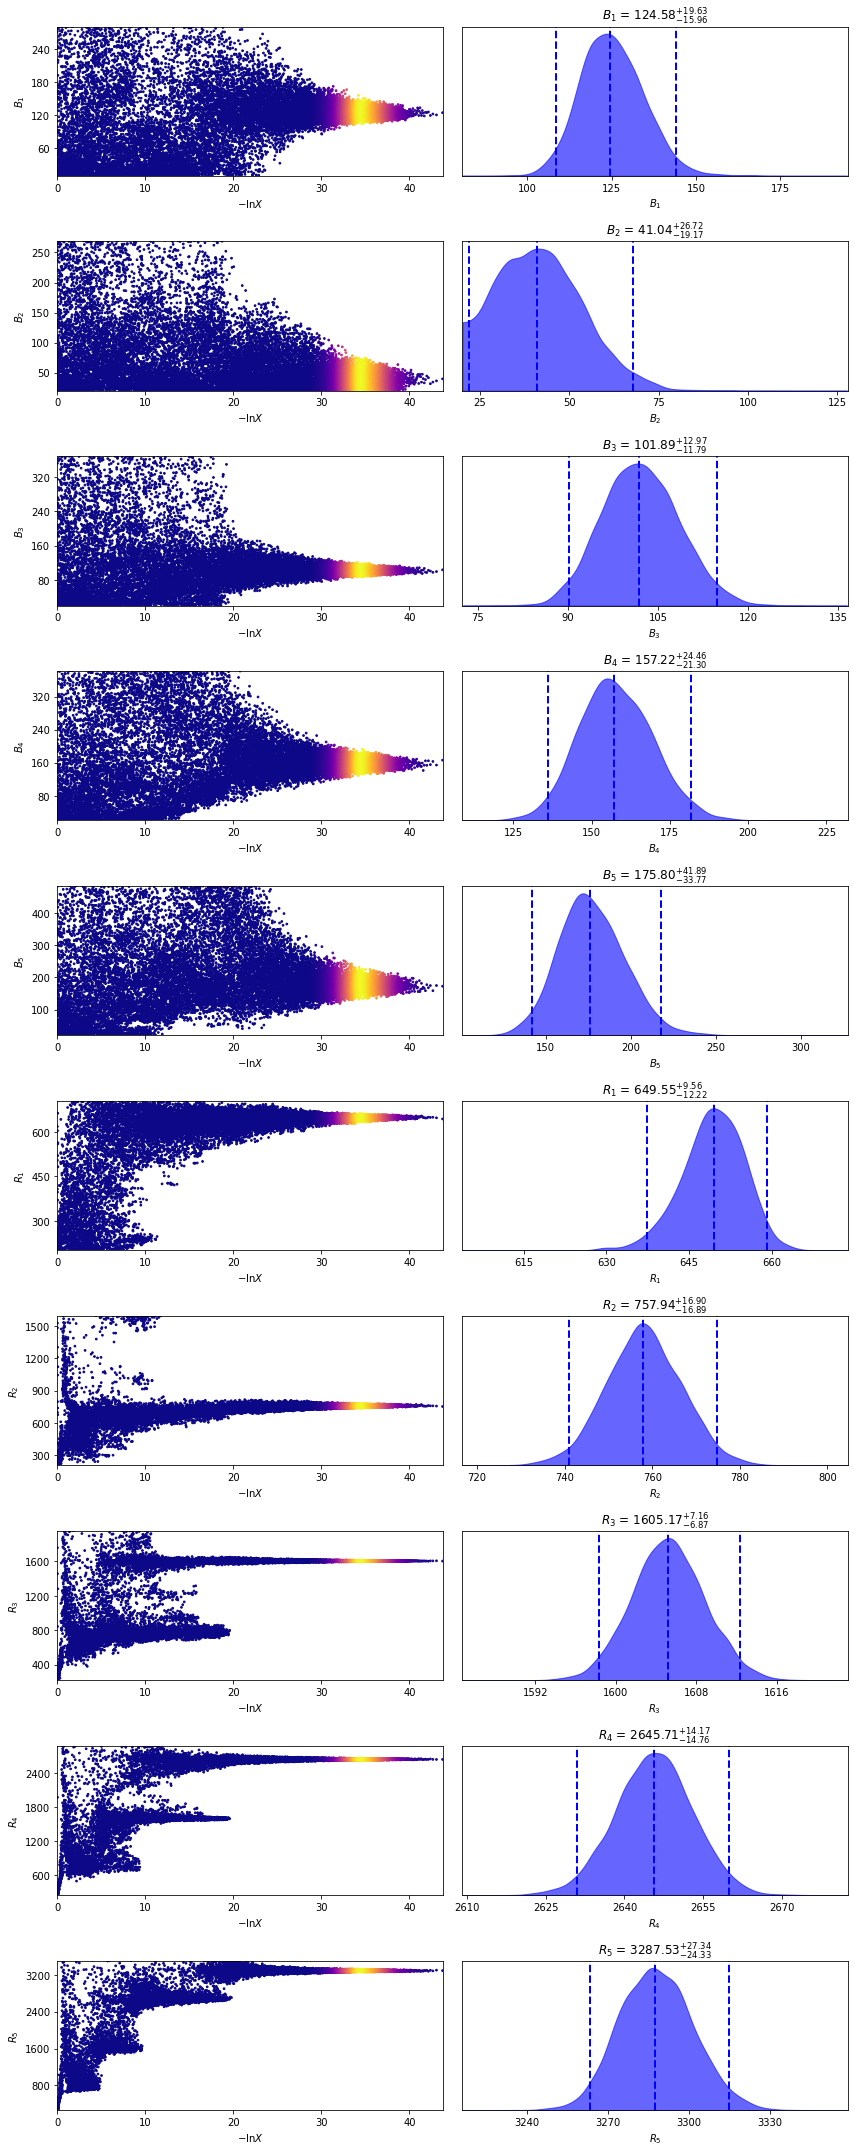

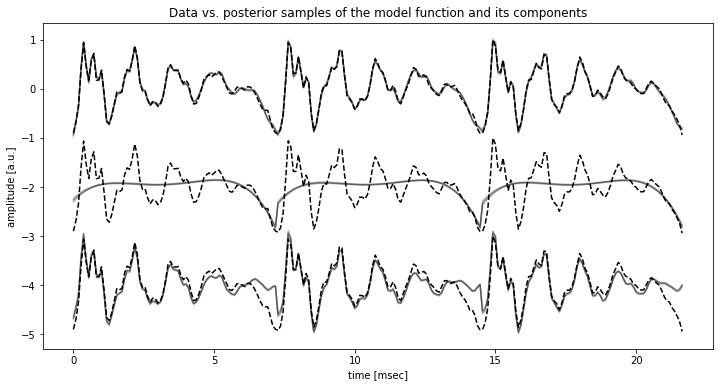

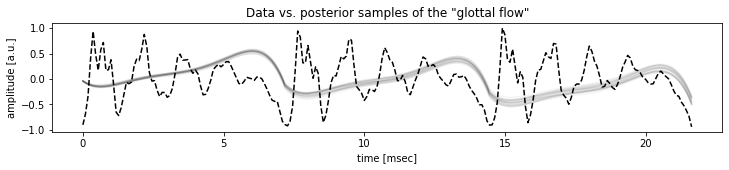

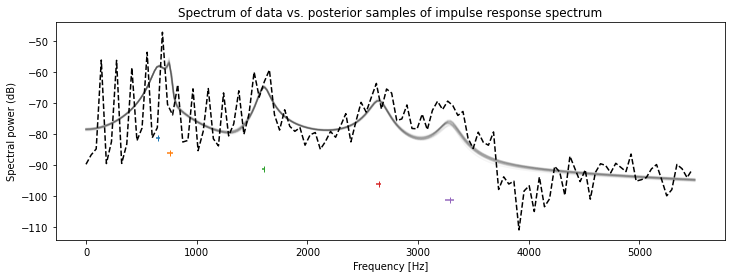

In [2]:
a = do('bdl/arctic_a0017', True, Q=5)

# æ in /ðæt/ ("that")
# F0 = 138 Hz
Posterior probability prob(P|Q=4,data):
╒════════════╤═══════════╕
│ P=5        │ P=7       │
╞════════════╪═══════════╡
│ 94.5(1.6)% │ 5.5(1.6)% │
╘════════════╧═══════════╛
Approximate SNR (dB) = [14.88(23)]
Periodic to data power ratio PDR (dB) = [-1.421(70)]
Bandwidths and frequency estimates (Hz):
╒════════════╤═══════════╤═══════════╤══════════╕
│ R1         │ R2        │ R3        │ R4       │
╞════════════╪═══════════╪═══════════╪══════════╡
│ 80.4(3.2)  │ 140(30)   │ 124(29)   │ 189(36)  │
├────────────┼───────────┼───────────┼──────────┤
│ 682.6(2.1) │ 2282(473) │ 1969(473) │ 3286(22) │
╘════════════╧═══════════╧═══════════╧══════════╛
Bandwidths and frequency estimates (Hz):
╒════════════╤═════════════╤═════════════╤═════════════╕
│ F1         │ F2          │ F3          │ F4          │
╞════════════╪═════════════╪═════════════╪═════════════╡
│ 124.7(1.0) │ 146.1(4.8)  │ 182.8(5.2)  │ 190(14)     │
├────────────┼─────────────┼─────────────

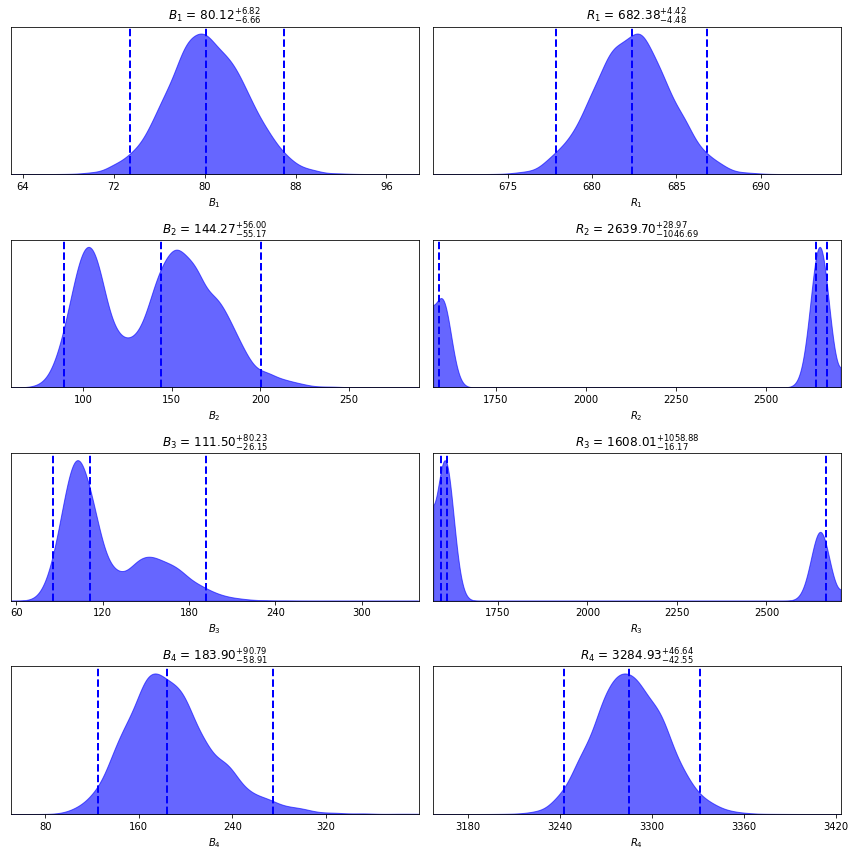

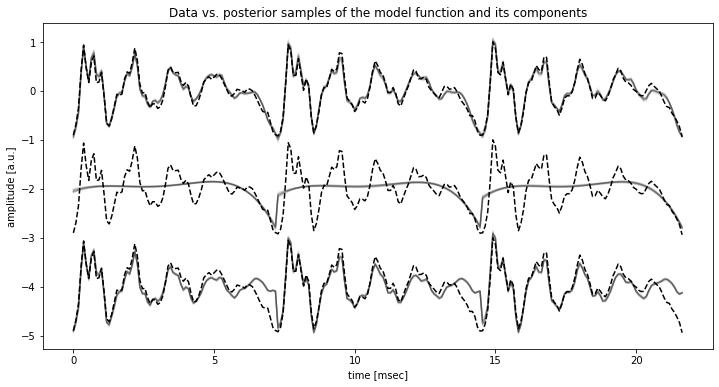

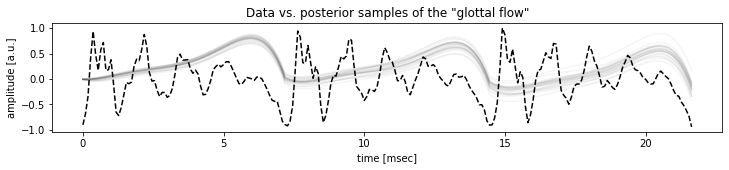

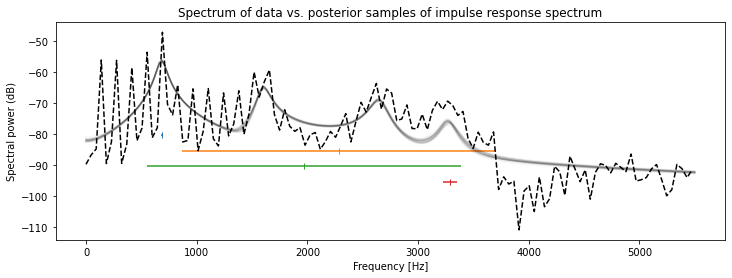

In [3]:
a = do('bdl/arctic_a0017', False, Q=4)

### `until`

- Well-resolved B1-B3 and R1-R3
- Splitting of F1 and F2 into well-resolved doublets
- Well-behaved trend

Old prior:

- Only found 2 formants
- F1 split in doublet but second frequency leans against its lower bound
- Formant estimates agree with new prior

# ə in /ənˈtɪl/ ("until")
# F0 = 110 Hz
Posterior probability prob(P|Q=5,data):
╒═════════╕
│ P=7     │
╞═════════╡
│ 100(0)% │
╘═════════╛
Log Z = 199.71(24)
Information (nats) = 28.213879848367696
Approximate SNR (dB) = [16.24(33)]
Periodic to data power ratio PDR (dB) = -2.134(48)
Bandwidths and frequency estimates (Hz):
╒═════════╤════════════╤══════════╤═════════════╤═════════════╕
│ R1      │ R2         │ R3       │ R4          │ R5          │
╞═════════╪════════════╪══════════╪═════════════╪═════════════╡
│ 125(19) │ 58.7(7.3)  │ 128(20)  │ 47(10)      │ 29.8(6.3)   │
├─────────┼────────────┼──────────┼─────────────┼─────────────┤
│ 496(15) │ 603.4(4.8) │ 1398(14) │ 1457.5(6.4) │ 2555.7(5.1) │
╘═════════╧════════════╧══════════╧═════════════╧═════════════╛
Approximate amplitude SNR per pitch period (dB) =
[-15.2(3.0) 13.17(40) 1.9(1.1) -4.0(4.4) 0.2(2.7) -4.9(5.1) 8.4(1.4)
 16.3(1.6) 17.52(79) 18.9(1.1) 2.6(4.1) 3.7(1.3) -8(30) 7.3(3.9) 7.7(3.6)
 2.0(3.5) -8.2(3.9)]
[-12.1(2.4) 

/home/marnix/WRK/proj/formant-prior/research/py/uninformative/plot.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.show()


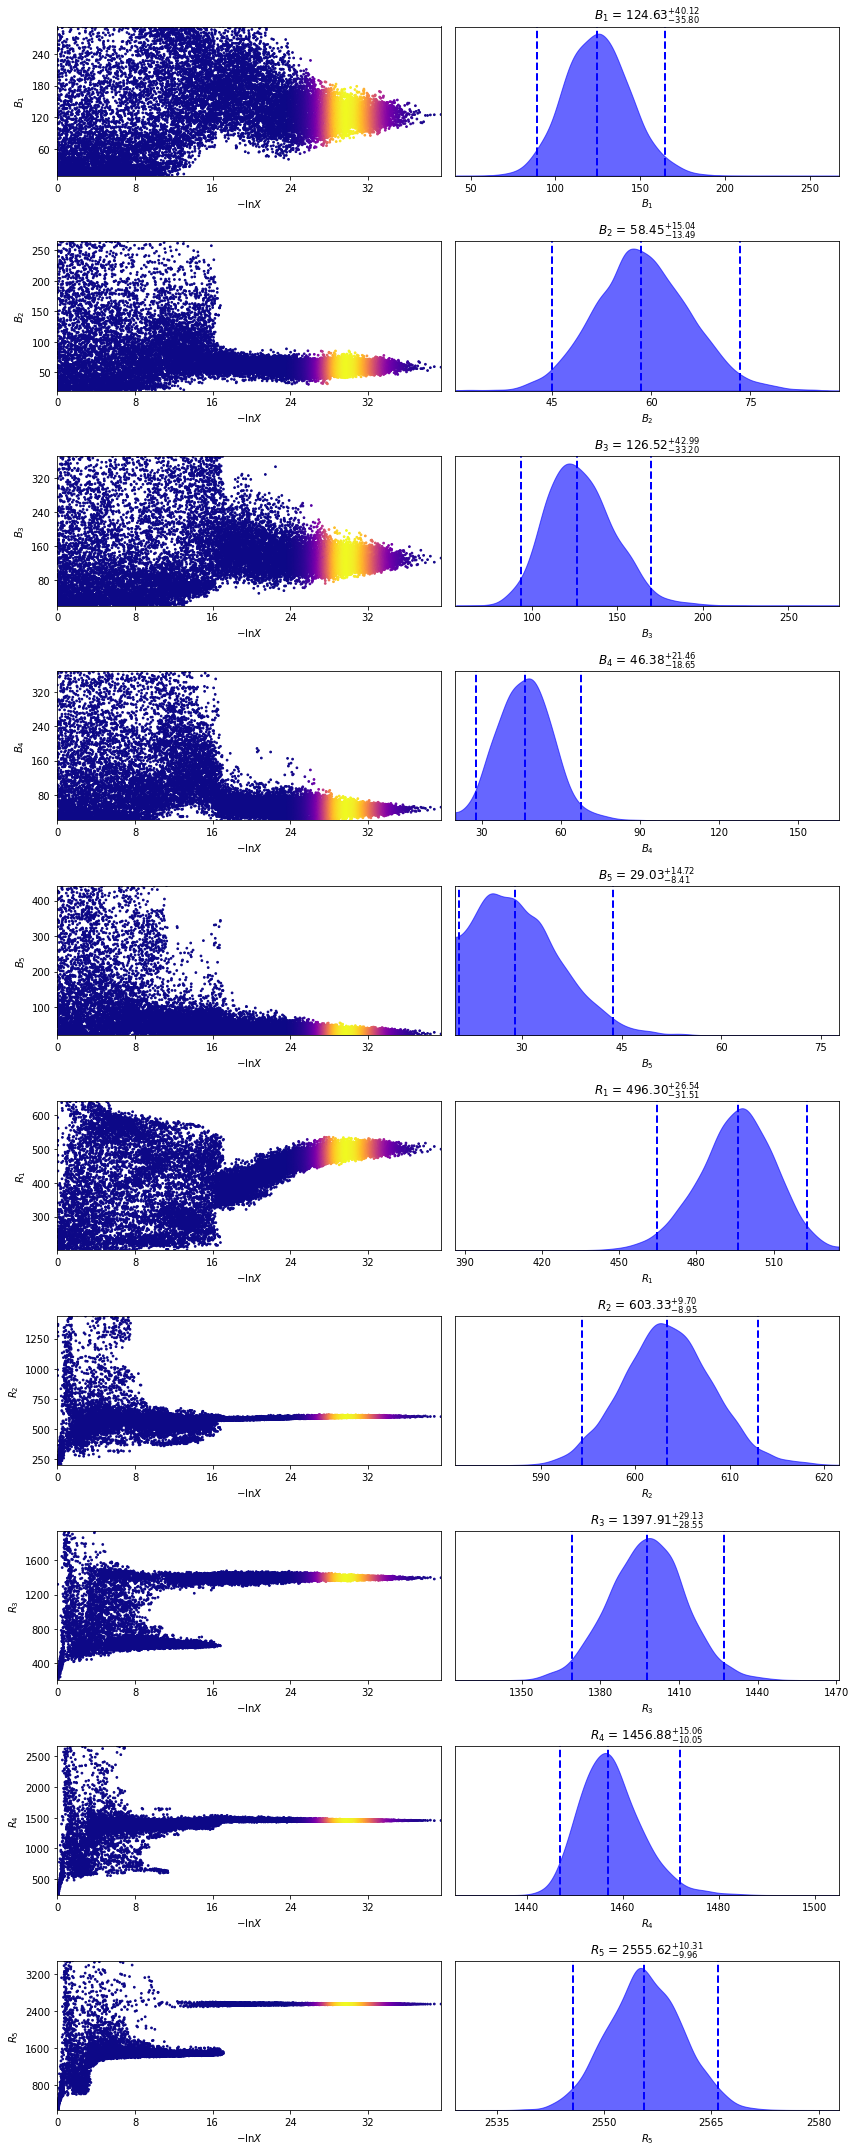

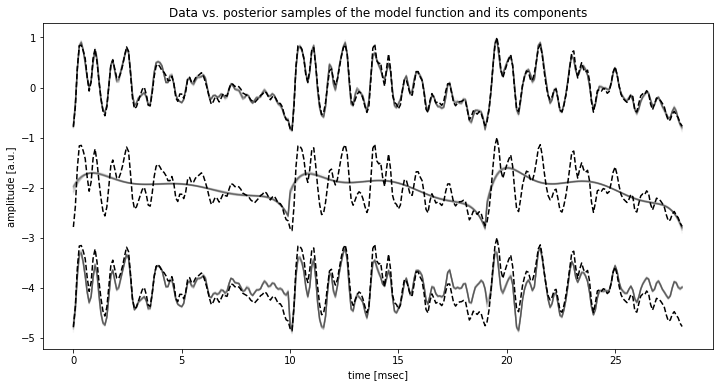

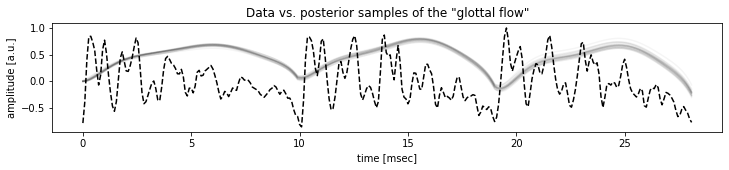

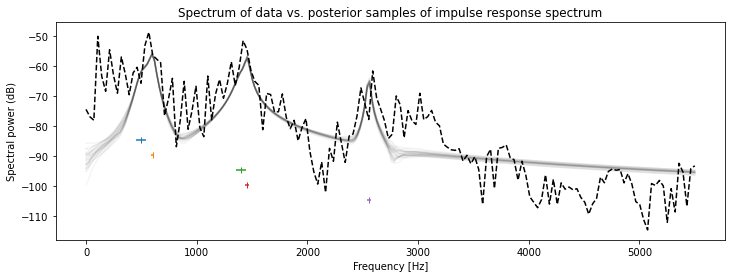

In [4]:
a = do('slt/arctic_b0041', True, Q=5)

# ə in /ənˈtɪl/ ("until")
# F0 = 110 Hz
Posterior probability prob(P|Q=3,data):
╒════════════╤════════════╕
│ P=3        │ P=7        │
╞════════════╪════════════╡
│ 13.4(2.9)% │ 86.6(2.9)% │
╘════════════╧════════════╛
Approximate SNR (dB) = [12.42(22)]
Periodic to data power ratio PDR (dB) = [-2.288(98)]
Bandwidths and frequency estimates (Hz):
╒═════════╤════════════╤═════════════╕
│ R1      │ R2         │ R3          │
╞═════════╪════════════╪═════════════╡
│ 126(22) │ 77(16)     │ 72.8(7.9)   │
├─────────┼────────────┼─────────────┤
│ 526(15) │ 719.6(8.3) │ 1440.3(3.5) │
╘═════════╧════════════╧═════════════╛
Bandwidths and frequency estimates (Hz):
╒════════════╤═════════════╕
│ F1         │ F2          │
╞════════════╪═════════════╡
│ 106.2(3.1) │ 117.0(1.2)  │
├────────────┼─────────────┤
│ 573.0(1.6) │ 1439.9(1.3) │
╘════════════╧═════════════╛


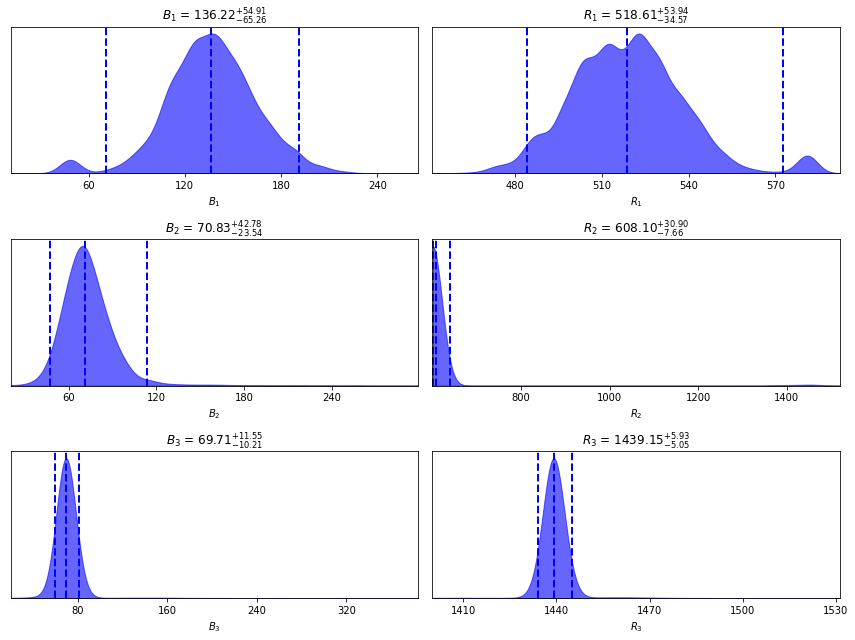

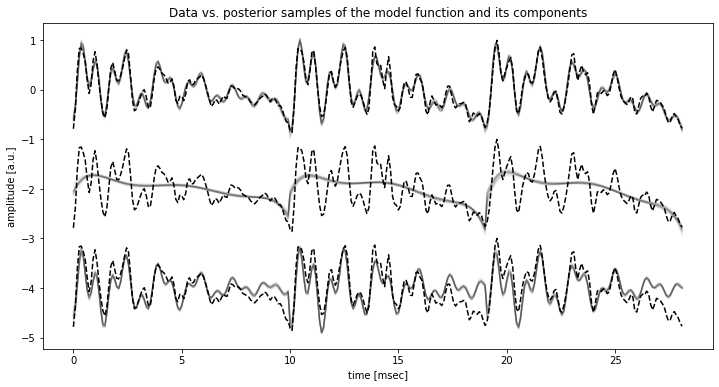

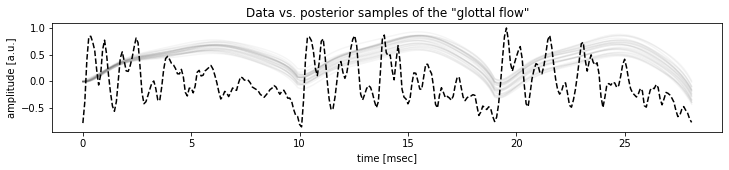

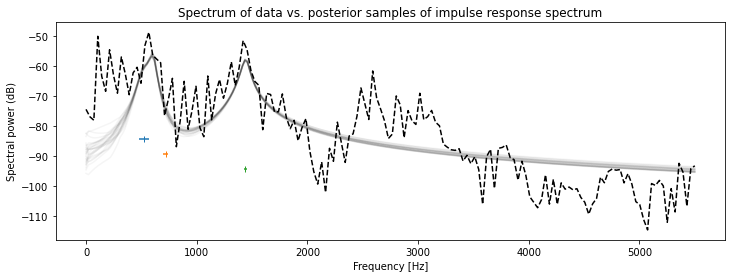

In [5]:
a = do('slt/arctic_b0041', False, Q=3)

### `little`

- Well-resolved B1-B3 and R1-R3
- Splitting of F1 and F2 into doublets of which the latter is well-resolved
- The trend $(P=10)$ has a strong low-frequency component of about 300 Hz. This component is also ignored (i.e. not labeled as a formant) in the best `new=False` model. It looks like we need `Q=6` or more for this data to make the best `P` smaller and to pick up this low-frequency component.
- PDR abnormally high; around zero dB (which is similar to what VTR models can achieve)

Old prior:

- Difficulty discovering F3: odds against F3 are 2:1. Estimate of F3 given $Q=4$ is off by about 5 sigmas
- F2 doublet well resolved
- Formant estimates agree with new prior, but F3 is not picked up because it the bump doesn't have enough prominence

# ɪ in /ˈlɪt(ə)l/ ("little")
# F0 = 102 Hz
Posterior probability prob(P|Q=5,data):
╒═════════╕
│ P=10    │
╞═════════╡
│ 100(0)% │
╘═════════╛
Log Z = 419.14(24)
Information (nats) = 28.84041641881055
Approximate SNR (dB) = [22.91(16)]
Periodic to data power ratio PDR (dB) = -0.80(16)
Bandwidths and frequency estimates (Hz):
╒═════════╤═════════╤═════════════╤═════════════╤═════════════╕
│ R1      │ R2      │ R3          │ R4          │ R5          │
╞═════════╪═════════╪═════════════╪═════════════╪═════════════╡
│ 84(49)  │ 182(70) │ 85.3(8.7)   │ 84.1(8.0)   │ 120(13)     │
├─────────┼─────────┼─────────────┼─────────────┼─────────────┤
│ 459(10) │ 509(24) │ 1270.7(4.8) │ 1436.4(4.4) │ 2652.4(7.5) │
╘═════════╧═════════╧═════════════╧═════════════╧═════════════╛
Approximate amplitude SNR per pitch period (dB) =
[0.8(3.2) 22.79(63) 6.2(7.5) 23.2(1.1) 18.7(2.4) -2(20) 11.2(2.1) 8.9(3.4)
 17.0(3.6) 16.1(2.5) 29.4(3.2) 12(33) 14.7(1.0) 5.1(2.5) 7.91(85) 20(12)
 10(27) 15.0(1.6) -4.1(3.5)

/home/marnix/WRK/proj/formant-prior/research/py/uninformative/plot.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.show()


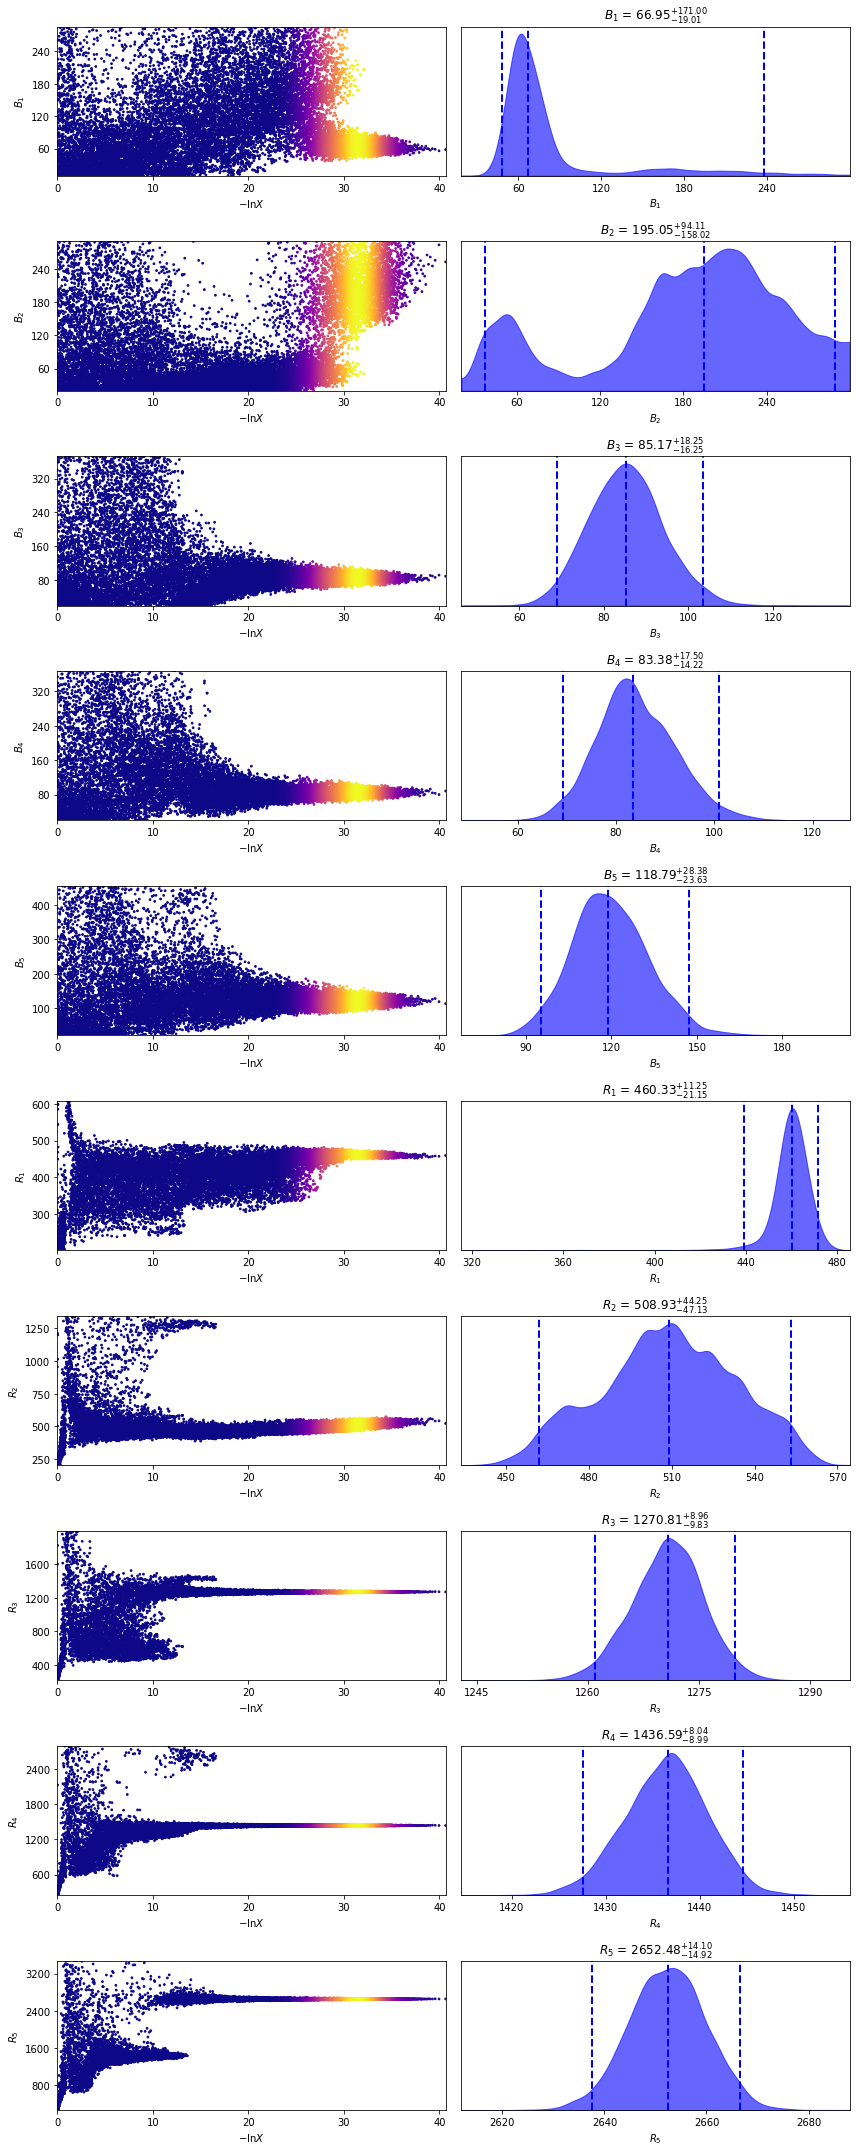

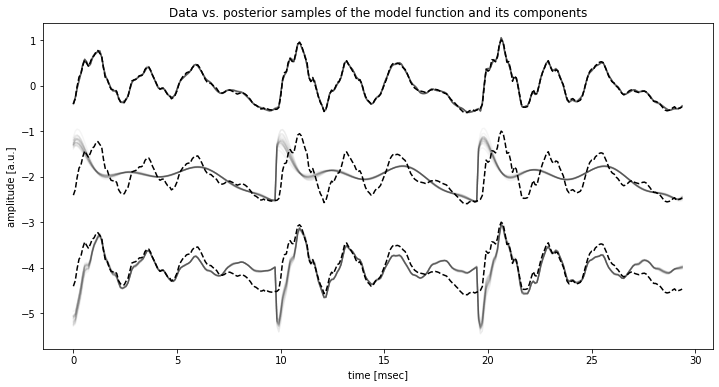

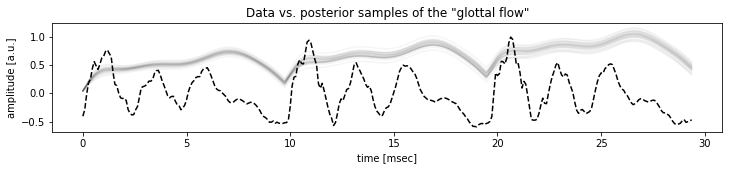

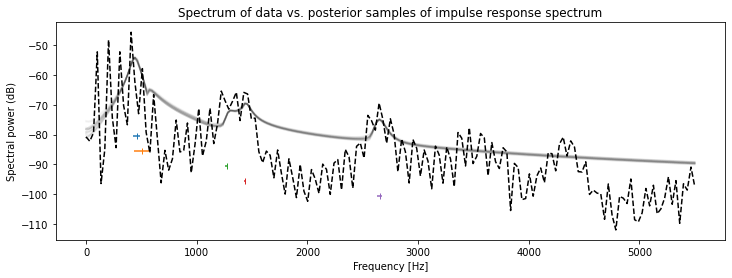

In [6]:
a = do('rms/arctic_a0382', True, Q=5)

# ɪ in /ˈlɪt(ə)l/ ("little")
# F0 = 102 Hz
Posterior probability prob(P|Q=3,data):
╒═════════╕
│ P=9     │
╞═════════╡
│ 100(0)% │
╘═════════╛
Log Z = 359.36(19)
Information (nats) = 18.70980017419521
Approximate SNR (dB) = [18.84(25)]
Periodic to data power ratio PDR (dB) = -2.332(80)
Bandwidths and frequency estimates (Hz):
╒════════════╤═════════════╤═════════════╕
│ R1         │ R2          │ R3          │
╞════════════╪═════════════╪═════════════╡
│ 44.8(2.1)  │ 89(15)      │ 95(14)      │
├────────────┼─────────────┼─────────────┤
│ 430.6(1.1) │ 1270.2(8.1) │ 1429.4(7.5) │
╘════════════╧═════════════╧═════════════╛
Approximate amplitude SNR per pitch period (dB) =
[-5.5(1.1) 17.85(32) 7.15(74) 16.13(45) 11.01(64) 13.14(72) -11.5(9.4)
 -14(14) 12.75(73) 21.86(37) 11.6(1.4) -4.4(5.4) -10(10) 8.0(1.9)
 -3.5(3.9)]
[-9.5(2.2) 17.83(37) 7.54(85) 16.06(47) 7.86(84) 15.35(49) 5.5(1.6)
 -47(735) 14.43(74) 24.26(38) 2.2(2.2) -10(11) -0.2(4.1) 4.2(2.1)
 10.2(1.1)]
[-11.7(2.9) 17.88(29) 6.27

/home/marnix/WRK/proj/formant-prior/research/py/uninformative/plot.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.show()


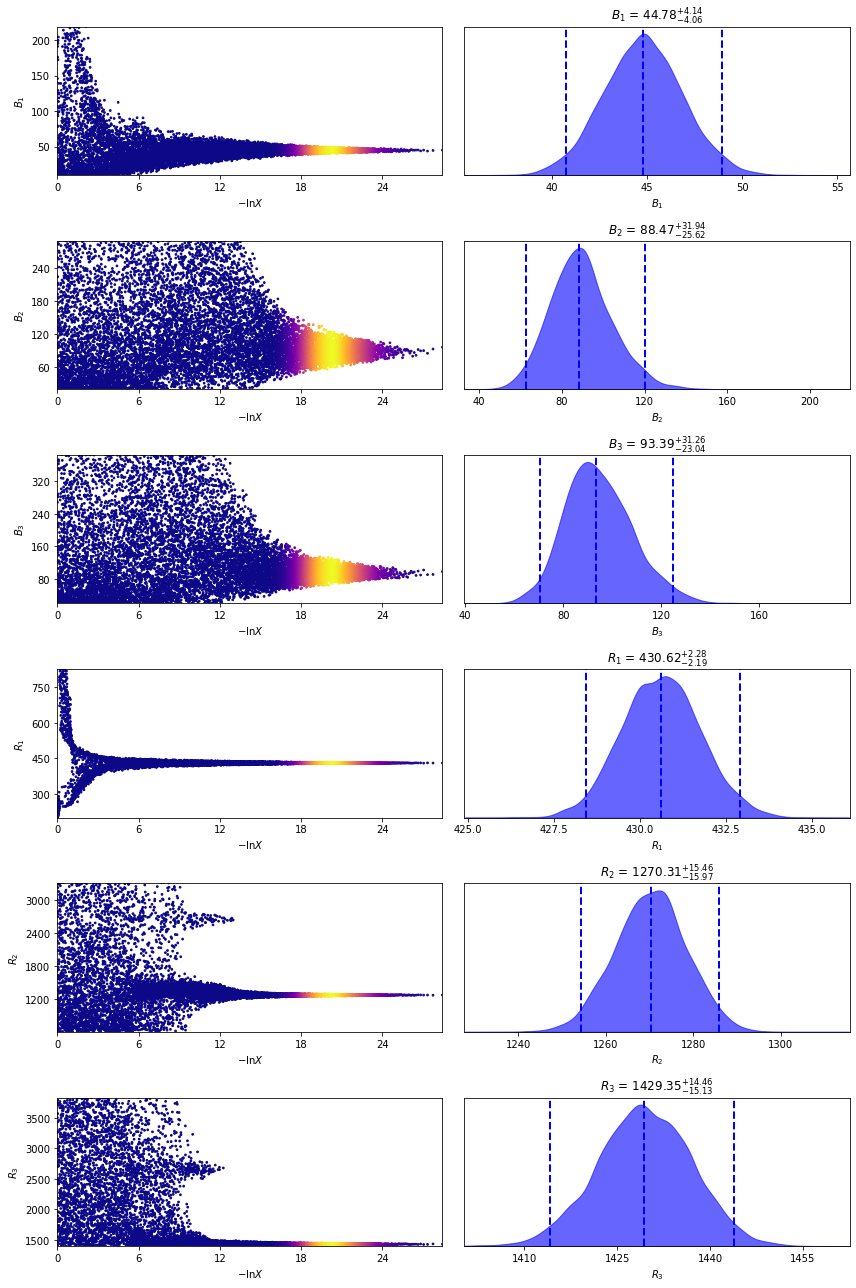

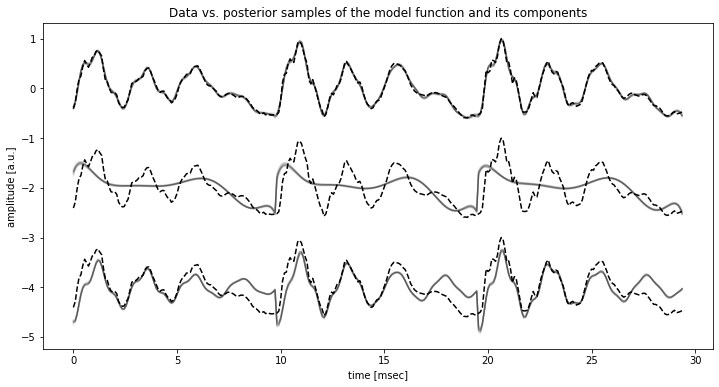

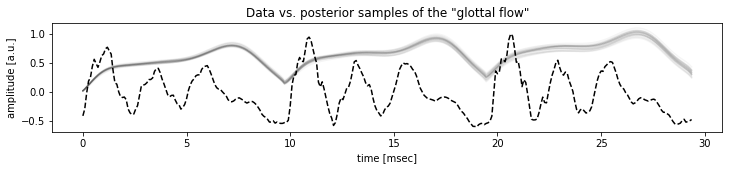

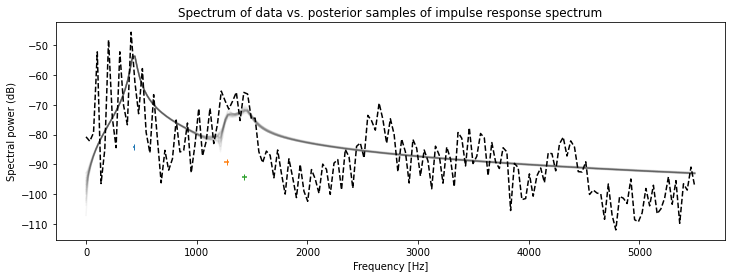

In [7]:
a = do('rms/arctic_a0382', False, Q=3)

# ɪ in /ˈlɪt(ə)l/ ("little")
# F0 = 102 Hz
Posterior probability prob(P|Q=4,data):
╒═════════╕
│ P=9     │
╞═════════╡
│ 100(0)% │
╘═════════╛
Log Z = 358.56(22)
Information (nats) = 25.062465700539803
Approximate SNR (dB) = [19.82(28)]
Periodic to data power ratio PDR (dB) = -2.334(64)
Bandwidths and frequency estimates (Hz):
╒════════════╤═════════════╤═════════════╤══════════╕
│ R1         │ R2          │ R3          │ R4       │
╞════════════╪═════════════╪═════════════╪══════════╡
│ 43.3(1.8)  │ 86(12)      │ 82(12)      │ 372(25)  │
├────────────┼─────────────┼─────────────┼──────────┤
│ 430.9(1.1) │ 1273.5(6.9) │ 1430.1(7.0) │ 2922(57) │
╘════════════╧═════════════╧═════════════╧══════════╛
Approximate amplitude SNR per pitch period (dB) =
[-3.75(97) 18.73(25) 7.45(58) 17.03(36) 12.60(65) 13.44(41) -5.0(5.4)
 -5.6(6.8) 13.53(66) 23.01(50) 12.4(1.2) -3.2(3.3) 3.4(2.4) -10(11)
 8.7(1.6) -8.4(6.9) 5.1(1.8)]
[-8.6(1.3) 18.91(40) 8.82(99) 16.78(31) 8.61(77) 16.30(35) 6.9(2.0)
 -41(37

/home/marnix/WRK/proj/formant-prior/research/py/uninformative/plot.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.show()


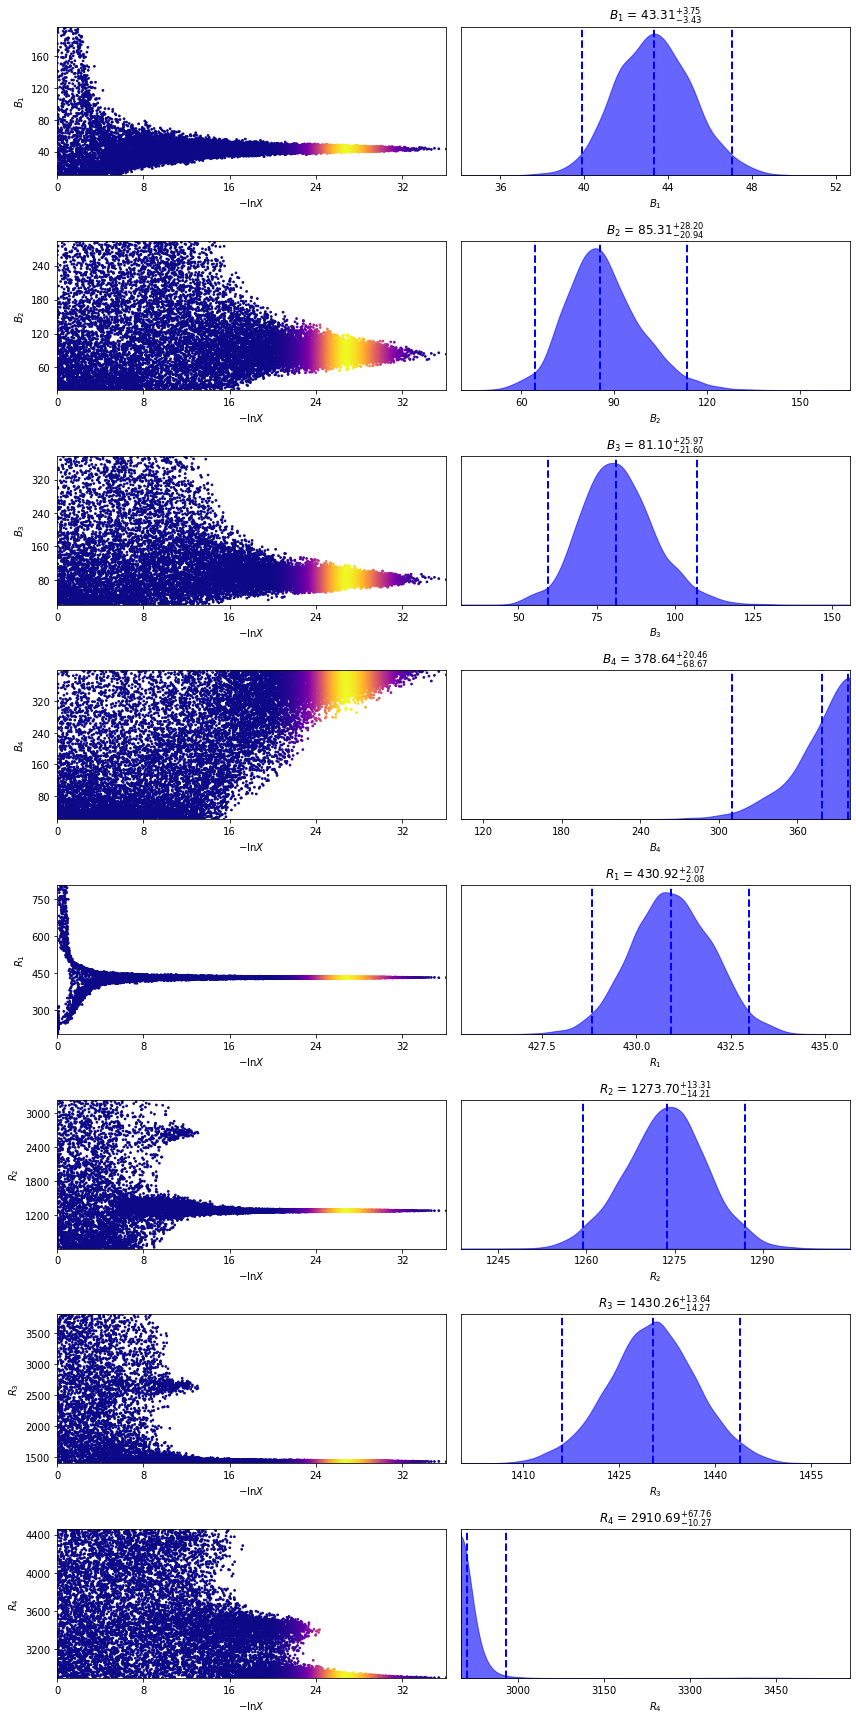

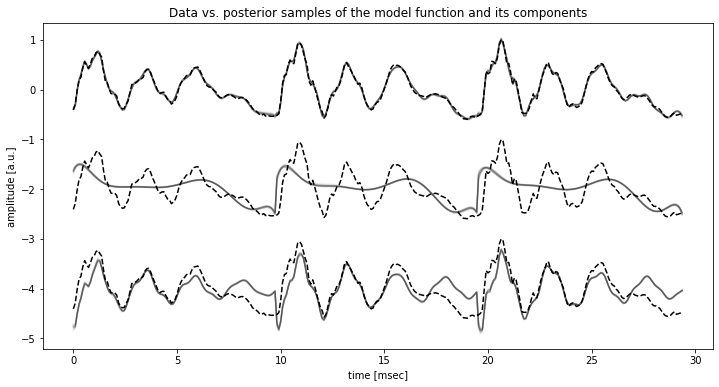

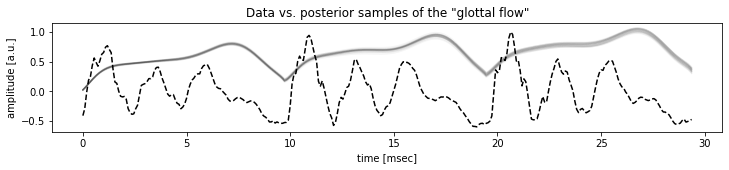

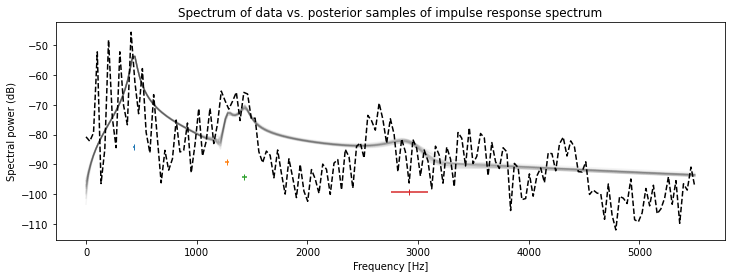

In [8]:
a = do('rms/arctic_a0382', False, Q=4)

## Analyze non "sure-thing" files

### `you`

- Well-resolved B1-B3 and R1-R3
- Splitting of F2 into reasonable well-resolved *triplet*; formant estimates continue to work well
- Acceptable trend
- Extremely high SNR, Low PDR
- `P=10` and `P=9` very similar

Old prior

- Peak hopping between R2 and R3, which upsets their mean ± sd estimates
- F3 *is* in fact resolved, as can be seen in the spectrum. Formant estimates continue to work, but bandwidth of F2 is underestimated due to missing pole in that vicinity
- Formant estimates agree with new prior

# u in /juː/ ("you")
# F0 = 96
Posterior probability prob(P|Q=5,data):
╒════════════╤════════════╕
│ P=9        │ P=10       │
╞════════════╪════════════╡
│ 36.0(7.8)% │ 64.0(7.8)% │
╘════════════╧════════════╛
Approximate SNR (dB) = [32.72(18)]
Periodic to data power ratio PDR (dB) = [-8.039(67)]
Bandwidths and frequency estimates (Hz):
╒════════════╤══════════╤══════════╤══════════╤═════════════╕
│ R1         │ R2       │ R3       │ R4       │ R5          │
╞════════════╪══════════╪══════════╪══════════╪═════════════╡
│ 92.3(3.6)  │ 189(23)  │ 205(28)  │ 202(28)  │ 114.4(7.2)  │
├────────────┼──────────┼──────────┼──────────┼─────────────┤
│ 339.1(1.3) │ 1621(11) │ 1662(20) │ 1727(14) │ 2221.5(4.2) │
╘════════════╧══════════╧══════════╧══════════╧═════════════╛


/home/marnix/WRK/proj/formant-prior/research/py/uninformative/formant.py:32: UserWarning: The number of formants Q is not the same across all 200 samples: filling out missing values with nans
Histogram of Q: (array([2, 3]), array([  8, 192]))
  warn(


Bandwidths and frequency estimates (Hz):
╒════════════╤═══════════╤═════════════╕
│ F1         │ F2        │ F3          │
╞════════════╪═══════════╪═════════════╡
│ 127.4(1.1) │ 298(43)   │ 121.5(3.7)  │
├────────────┼───────────┼─────────────┤
│ 335.78(79) │ 1666(114) │ 2218.7(3.1) │
╘════════════╧═══════════╧═════════════╛


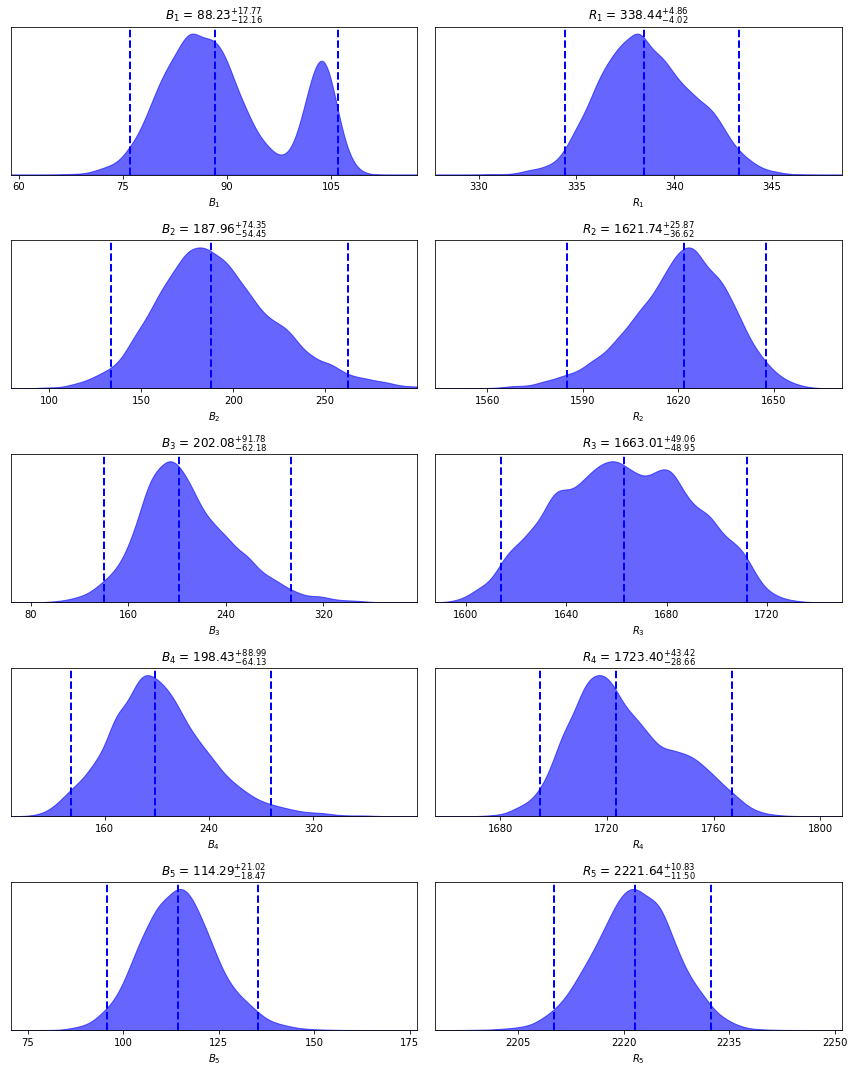

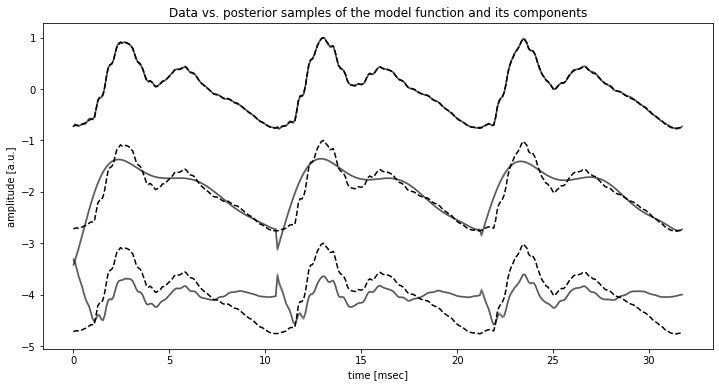

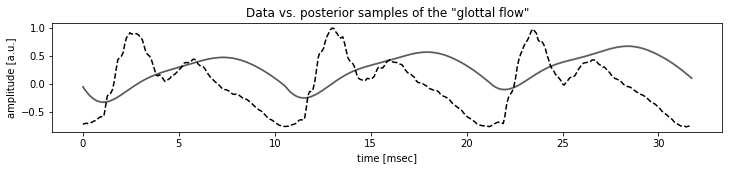

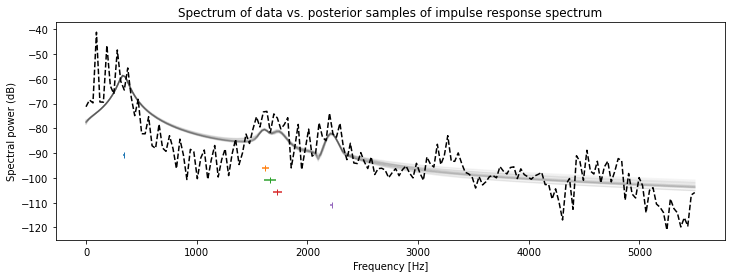

In [9]:
a = do("jmk/arctic_a0067", True, Q=5)

# u in /juː/ ("you")
# F0 = 96
Posterior probability prob(P|Q=3,data):
╒═════════╕
│ P=9     │
╞═════════╡
│ 100(0)% │
╘═════════╛
Log Z = 653.04(19)
Information (nats) = 18.458177040137684
Approximate SNR (dB) = [28.19(32)]
Periodic to data power ratio PDR (dB) = -7.37(11)
Bandwidths and frequency estimates (Hz):
╒════════════╤═══════════╤═══════════╕
│ R1         │ R2        │ R3        │
╞════════════╪═══════════╪═══════════╡
│ 101.8(3.2) │ 118(15)   │ 119(14)   │
├────────────┼───────────┼───────────┤
│ 337.1(2.4) │ 1934(279) │ 1901(279) │
╘════════════╧═══════════╧═══════════╛
Approximate amplitude SNR per pitch period (dB) =
[-14.7(9.1) 23.01(54) 32.84(28) 29.10(31) 27.22(37) 25.44(29) -10(14)
 20.6(1.0) 16.0(1.7) 32.76(36) 6.7(1.1) 6.5(2.7) 21.0(2.9) -36(741) 1(12)]
[2.1(1.2) 26.11(45) 31.42(30) 26.89(39) 26.04(51) 26.25(33) 5.0(3.3)
 19.13(77) 14.2(1.9) 29.57(77) -9(74) 8(10) 29.44(85) 11.0(5.6) 6(11)]
[3.67(58) 27.67(36) 29.88(30) 23.62(45) 23.09(69) 26.22(36) 15.07(75)
 16.99

/home/marnix/WRK/proj/formant-prior/research/py/uninformative/formant.py:32: UserWarning: The number of formants Q is not the same across all 200 samples: filling out missing values with nans
Histogram of Q: (array([2, 3, 4]), array([110,  88,   2]))
  warn(


Bandwidths and frequency estimates (Hz):
╒════════════╤═════════════╤══════════╤═════════════╕
│ F1         │ F2          │ F3       │ F4          │
╞════════════╪═════════════╪══════════╪═════════════╡
│ 138.1(1.6) │ 182(11)     │ 193(101) │ 1156(10)    │
├────────────┼─────────────┼──────────┼─────────────┤
│ 338.5(2.9) │ 1657.7(7.1) │ 2211(28) │ 2452.0(6.0) │
╘════════════╧═════════════╧══════════╧═════════════╛


/home/marnix/WRK/proj/formant-prior/research/py/uninformative/plot.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.show()


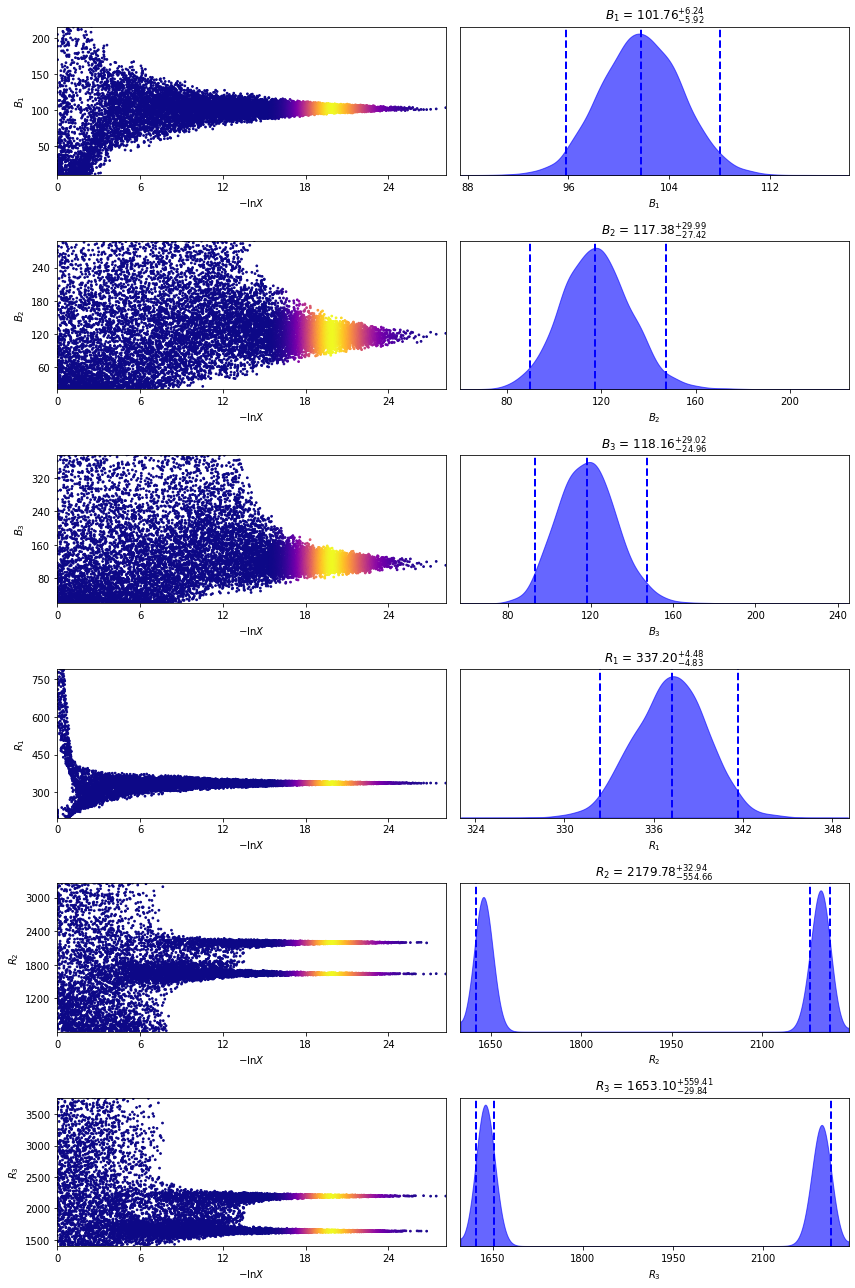

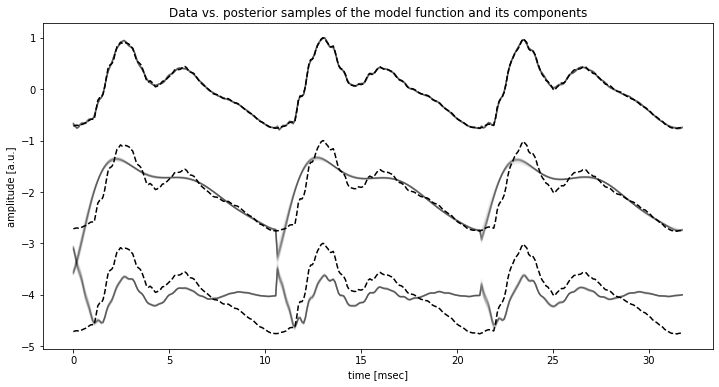

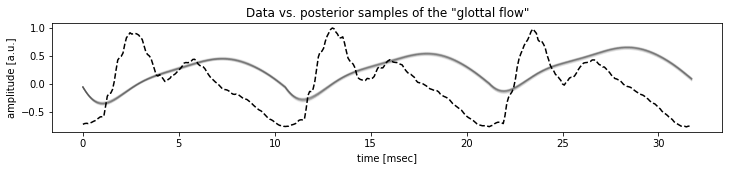

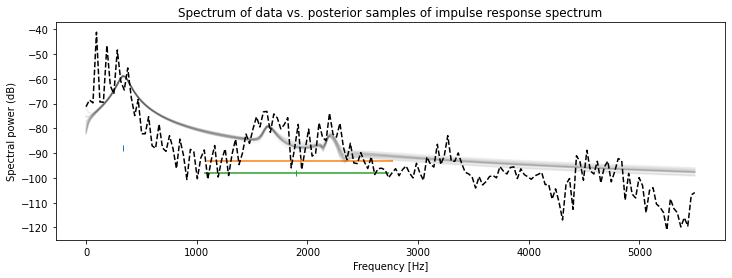

In [10]:
a = do("jmk/arctic_a0067", False, Q=3)

### `shore`

- High uncertainty about `P`
- Well-resolved B2-B5 and R1-R5; B1 is broad
- Splitting of F1 and F2 into a well-resolved doublet and *triplet*, resp.
- Good glottal flow estimate
- Extremely high SNR
- Next most probable models have higher `P`:
  * `P=8`: Very similar to `P=7`
  * `P=9`: Trend has a low-frequency component of about 250 Hz. Model much higher uncertainty and corresponding lower information than best model. **Thus with this example we see that oscillatory behaviour of trend is penalized but probably not enough.**
  
  Still the `P`-averaged glottal flow posterior estimate is sharp; the uncertainties do not interfere negatively
  
Old model:

- Just expands F1 and F2 in two very clean VTRs (R1 and R2)
- Formant estimates agree roughly with new prior; F1 is off because width of peak is underestimated

# ɔ in /ʃɔː(r)/ ("shore")
# F0 = 113 Hz
Posterior probability prob(P|Q=5,data):
╒════════════╤════════════╤════════════╕
│ P=7        │ P=8        │ P=9        │
╞════════════╪════════════╪════════════╡
│ 43.7(6.7)% │ 37.3(6.2)% │ 18.9(3.7)% │
╘════════════╧════════════╧════════════╛
Approximate SNR (dB) = [37.89(17)]
Periodic to data power ratio PDR (dB) = [-3.155(77)]
Bandwidths and frequency estimates (Hz):
╒═════════╤════════════╤═════════╤════════════╤════════════╕
│ R1      │ R2         │ R3      │ R4         │ R5         │
╞═════════╪════════════╪═════════╪════════════╪════════════╡
│ 122(29) │ 71.9(9.7)  │ 98(16)  │ 139(16)    │ 108(13)    │
├─────────┼────────────┼─────────┼────────────┼────────────┤
│ 309(12) │ 428.5(6.1) │ 651(14) │ 814.2(6.2) │ 835.6(5.5) │
╘═════════╧════════════╧═════════╧════════════╧════════════╛
Bandwidths and frequency estimates (Hz):
╒════════════╤════════════╕
│ F1         │ F2         │
╞════════════╪════════════╡
│ 111.7(2.5) │ 116.94(81) │
├─────

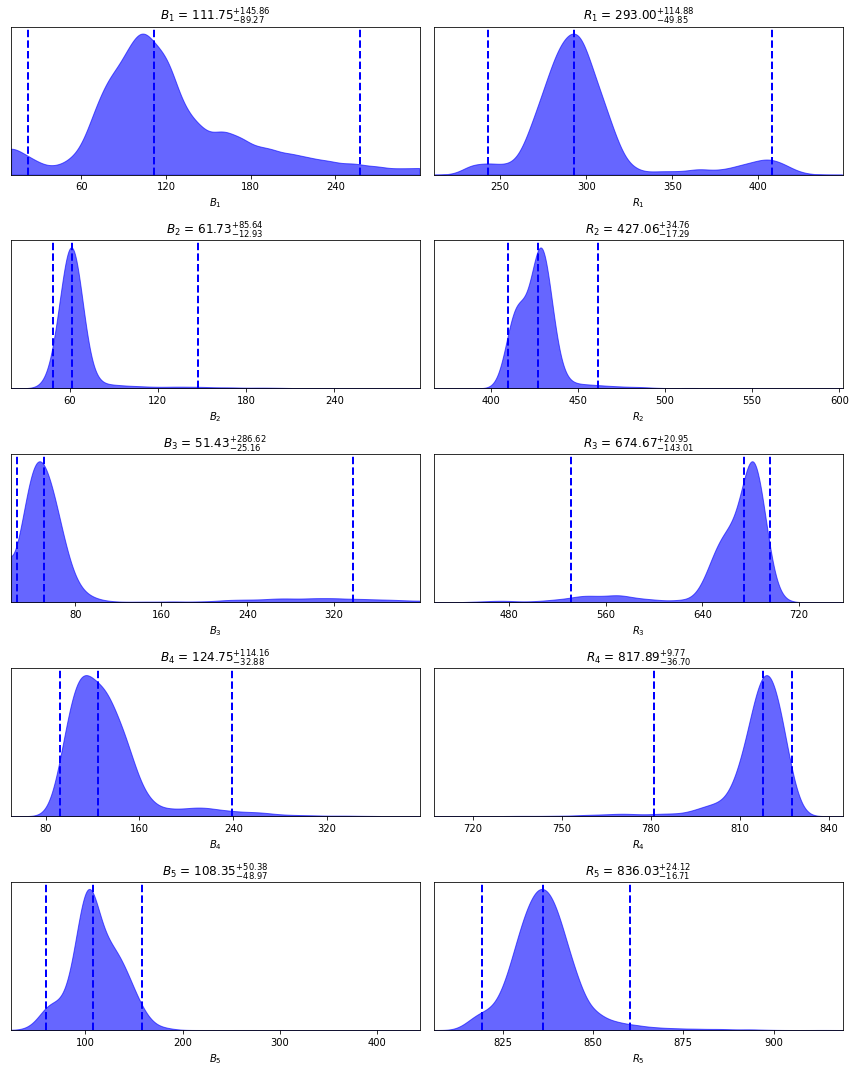

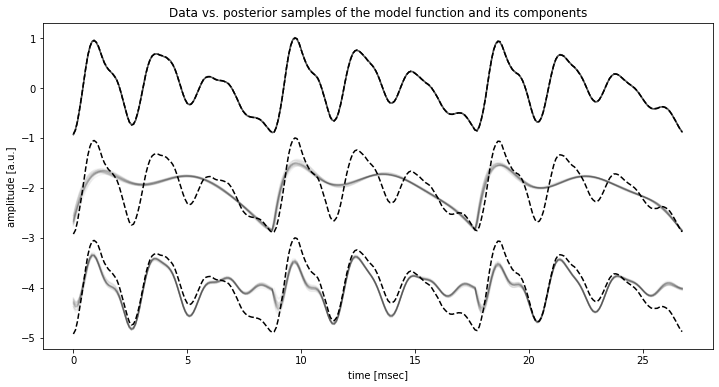

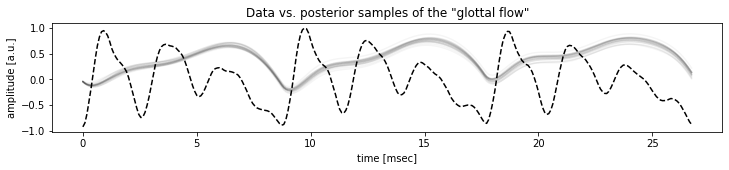

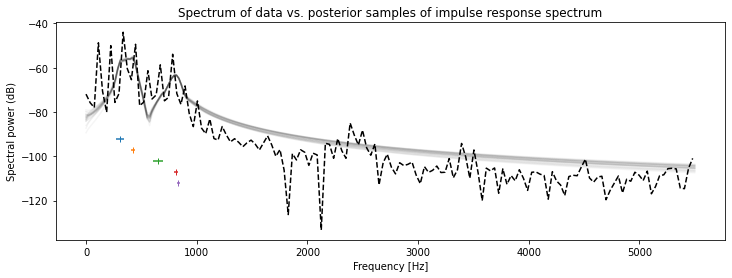

In [11]:
a = do("awb/arctic_a0094", True, Q=5)

# ɔ in /ʃɔː(r)/ ("shore")
# F0 = 113 Hz
Posterior probability prob(P|Q=2,data):
╒═════════╕
│ P=10    │
╞═════════╡
│ 100(0)% │
╘═════════╛
Log Z = 554.59(18)
Information (nats) = 16.218004860222095
Approximate SNR (dB) = [29.12(24)]
Periodic to data power ratio PDR (dB) = -4.06(15)
Bandwidths and frequency estimates (Hz):
╒════════════╤════════════╕
│ R1         │ R2         │
╞════════════╪════════════╡
│ 39.8(2.8)  │ 78.8(2.4)  │
├────────────┼────────────┤
│ 429.1(2.3) │ 800.8(1.1) │
╘════════════╧════════════╛
Approximate amplitude SNR per pitch period (dB) =
[3.60(66) 28.69(24) 24.96(37) 27.85(27) 9.1(3.3) 18.6(1.2) 29.49(34)
 31.28(37) 19.6(1.3) 23.19(79) 26.82(95) 23.37(38) 27.80(41) 22.74(31)]
[10.67(37) 28.89(23) 23.69(39) 27.49(31) -4(13) 18.4(1.5) 28.53(33)
 31.26(39) -0.7(13.0) 21.1(1.3) 27.21(96) 20.28(49) 28.61(41) 25.14(29)]
[5.69(54) 28.34(25) 22.07(42) 27.00(35) 6.8(3.5) 19.9(1.3) 28.81(31)
 30.70(40) -27(228) 18.7(1.6) 25.4(1.1) 16.65(65) 29.12(40) 25.74(31)]
Bandwid

/home/marnix/WRK/proj/formant-prior/research/py/uninformative/plot.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.show()


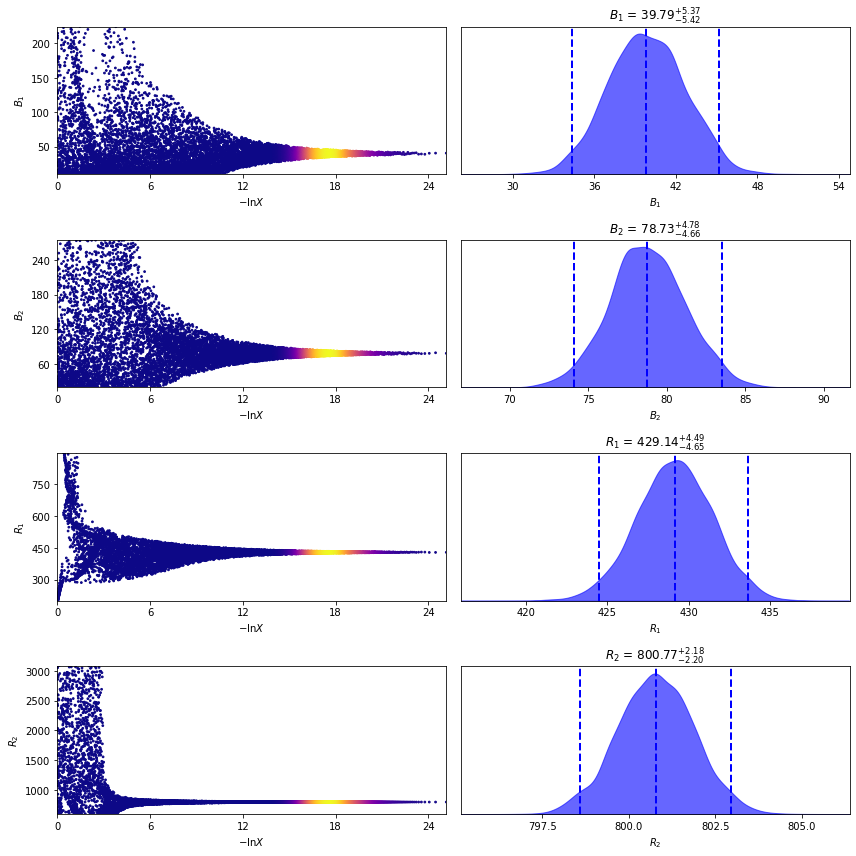

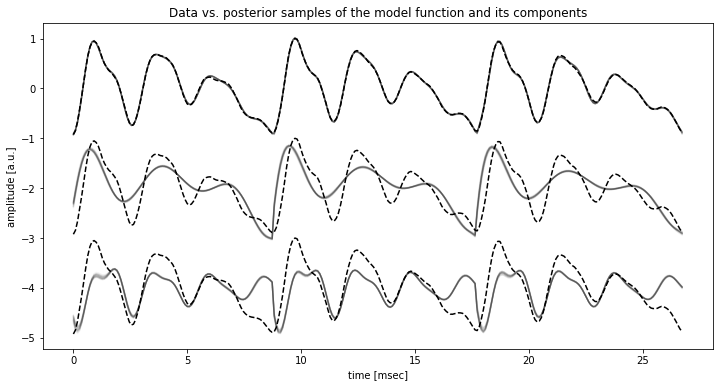

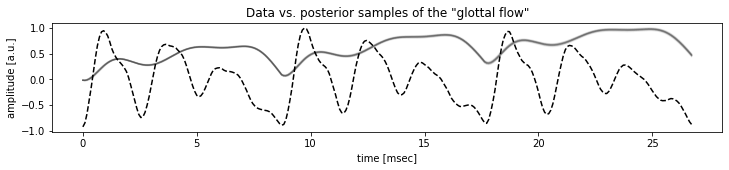

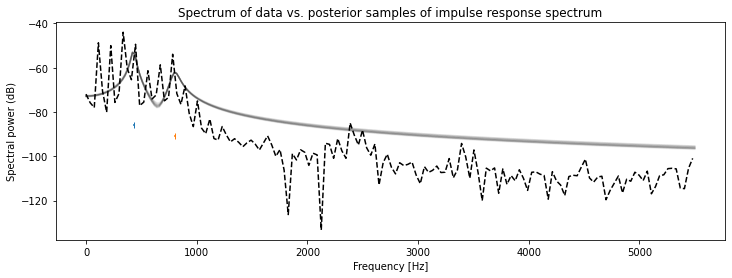

In [12]:
a = do("awb/arctic_a0094", False, Q=2)